In [72]:
import pandas as pd
import regex
import re
import seaborn as sns
import matplotlib as plt
import numpy as np

In [46]:
data = pd.read_csv("data/attacks.csv",encoding='cp1252')

In [47]:
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df_data = pd.DataFrame(data).head(150)

In [167]:
df_data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2017.05.03,03-May-2017,2017.0,Invalid,USA,California,"Sunset Beach, Orange County",Surfing,Sophia Raab,F,...,Shark involvement highly doubtful,"R. Collier, GSAF",2017.05.03-Raab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.03,2017.05.03,6158.0,NaN,NaN
146,2017.04.29.d,29-Apr-2017,2017.0,Unprovoked,USA,California,"San Onofre, San Diego County",Swimming,Leeanne Ericson,F,...,NaN,"R. Collier, GSAF",2017.04.29.d-Ericson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.29.d,2017.04.29.d,6157.0,NaN,NaN
147,2017.04.29.c,29-Apr-2017,2017.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Keurbooms, Plettenberg Bay",Surfing,male,M,...,NaN,"J. de Villiars, News24, 4/29/2017",2017.04.29.c-Plett.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.29.c,2017.04.29.c,6156.0,NaN,NaN
148,2017.04.29.b,29-Apr-2017,2017.0,Unprovoked,USA,South Carolina,"Folly Beach, Charleston County",Surfing,Holly Dyar,F,...,NaN,"C. Creswell, GSAF",2017.04.29.b-Dyar.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.29.b,2017.04.29.b,6155.0,NaN,NaN


*** Hipótesis ***
- Consideramos que el numero de casos por ataque de tiburones es mayor en las actividades de surf en Astraulia. Y ahora, mediante una limpieza y un análisis de los datos proporcionados vamos a intentar demostrarlo.

In [218]:
# Analizamos todos los tipos de datos que nos vamos a poder encontrar
df_data.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
pdf                        object
href formula               object
href                       object
Case Number.1              object
Case Number.2              object
original order            float64
Unnamed: 22                object
Unnamed: 23                object
fill_0                     object
fill_forward               object
dtype: object

In [169]:
# Esto NO sirve para mi hipotesis además de que no tiene ningun sentido la columna de los años
df_data.describe()

,Year,original order
count,150.000000,150.000000
mean,2017.353333,6228.500000
std,0.479606,43.445368
min,2017.000000,6154.000000
25%,2017.000000,6191.250000
50%,2017.000000,6228.500000
75%,2018.000000,6265.750000
max,2018.000000,6303.000000


In [170]:
# Vemos que tipo de datos tenemos en nuestra tabla sacando los nombres de las columanas donde nuestros datos estan agrupados
df_data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [171]:
df_data[['Country', 'Activity']]

,Country,Activity
0,USA,Paddling
1,USA,Standing
2,USA,Surfing
3,AUSTRALIA,Surfing
4,MEXICO,Free diving
...,...,...
145,USA,Surfing
146,USA,Swimming
147,SOUTH AFRICA,Surfing
148,USA,Surfing


In [172]:
df_data["Activity"]

0           Paddling
1           Standing
2            Surfing
3            Surfing
4        Free diving
           ...      
145          Surfing
146         Swimming
147          Surfing
148          Surfing
149    Body boarding
Name: Activity, Length: 150, dtype: object

In [173]:
df_data["Country"]

0               USA
1               USA
2               USA
3         AUSTRALIA
4            MEXICO
           ...     
145             USA
146             USA
147    SOUTH AFRICA
148             USA
149         REUNION
Name: Country, Length: 150, dtype: object

In [187]:
# Muy util!!
# freq = nº de ves que sale surfing
# count = las actividades en total --> 146 actividades (repetidas o no) pero nosotros tenemos 150 casos... ALGO RARO!

df_data.Activity.describe()

count         146
unique         36
top       Surfing
freq           44
Name: Activity, dtype: object

In [175]:
# Muy util!!
# freq = nº de ves que sale USA
# count = los paises en total --> 149 actividades (repetidas o no) pero nosotros tenemos 150 casos... ALGO RARO!

df_data.Country.describe()

count     149
unique     28
top       USA
freq       56
Name: Country, dtype: object

In [178]:
# Vemos el nº de casos de ataque por hacer surf
# SI QUITAMOS EL SHAPE[0] NOS SALDRIA UNA TABLA CON TODOS LOS CASOS HACIENDO SURF
df_data[df_data.Activity=='Surfing'].shape[0]

44

In [179]:
# Comprobamos que haciendo surf tenga el mayor nº de ataques.
# Hemos acertado, el Surf tiene el mayor nº de atque por tiburon

df_data['Activity'].value_counts()

Surfing                        44
Swimming                       25
Fishing                        10
Spearfishing                    8
Snorkeling                      8
Feeding sharks                  4
Scuba Diving                    4
Body boarding                   4
Kayaking                        3
SUP                             2
Wading                          2
Free diving                     2
Scuba diving                    2
Standing                        2
Surfing                         2
Kayaking / Fishing              2
Walking                         2
Stand-Up Paddleboarding         2
Paddling                        1
Fishing / Wading                1
Body surfing                    1
Boogie boarding                 1
Cleaning fish                   1
Canoeing                        1
2 boats capsized                1
Skimboarding                    1
Windsurfing                     1
Swimming, poaching abalone      1
Fishing                         1
Kite surfing  

In [220]:
# vemos el nº de casos en Australia en total
# SI QUITAMOS EL SHAPE[0] NOS SALDRIA UNA TABLA CON TODOS LOS CASOS EN AUSTRALIA

df_data[df_data.Country=='AUSTRALIA'].shape[0]

37

In [181]:
# Comprobamos si en Australia está el maximo de casos
# Vemos que no, nos hemos equivocado, en USA hay mas casos.

df_data['Country'].value_counts()

USA                                      56
AUSTRALIA                                37
SOUTH AFRICA                              9
BAHAMAS                                   8
BRAZIL                                    5
SPAIN                                     4
MEXICO                                    3
COSTA RICA                                3
THAILAND                                  2
NEW ZEALAND                               2
REUNION                                   2
NEW CALEDONIA                             2
JAPAN                                     1
EGYPT                                     1
ECUADOR                                   1
UNITED ARAB EMIRATES                      1
ST HELENA, British overseas territory     1
SAMOA                                     1
FRENCH POLYNESIA                          1
MAURITIUS                                 1
SOLOMON ISLANDS                           1
CUBA                                      1
MALAYSIA                        

<AxesSubplot:xlabel='Country', ylabel='count'>

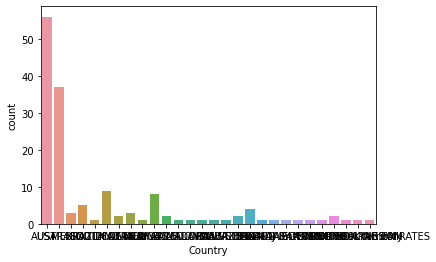

In [182]:
sns.countplot(x = df_data.Country)

<AxesSubplot:xlabel='Activity', ylabel='count'>

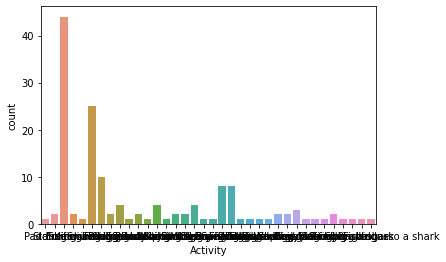

In [183]:
sns.countplot(x = df_data.Activity)

In [184]:
# Contar cuantos datos hay en total, aqui nos podemos fijar si en nuestra variables que vamos a utilizar existen valores NAN
# podemos ver que hay algo que esta mal ya que nuestro DataFrame tiene 150 filo y, por tanto 150 casos de ataque PERO
# sin nos fijamos los columnas no tenemos los mismos casos --> SE DEBE A LOS DATOS NAN

df_data.count()

Case Number               150
Date                      150
Year                      150
Type                      149
Country                   149
Area                      140
Location                  145
Activity                  146
Name                      147
Sex                       146
Age                       101
Injury                    150
Fatal (Y/N)               140
Time                      102
Species                    99
Investigator or Source    149
pdf                       150
href formula              150
href                      150
Case Number.1             150
Case Number.2             150
original order            150
Unnamed: 22                 0
Unnamed: 23                 0
dtype: int64

In [185]:
# Vamos a comprobar visualmente donde estan nuestros valores NAN
# Como trabajamos con muchisimos datos es imposible que sea visual esta manera
df_data.isnull()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
146,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
147,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
148,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True


In [186]:
# Como el metodo anterior no es muy visual, vamos a sacar el numero de valores NAN que hay por cada columna para poder fijarnos 
# en nuestras dos columnas de la hipótesis

df_data.isnull().sum()

Case Number                 0
Date                        0
Year                        0
Type                        1
Country                     1
Area                       10
Location                    5
Activity                    4
Name                        3
Sex                         4
Age                        49
Injury                      0
Fatal (Y/N)                10
Time                       48
Species                    51
Investigator or Source      1
pdf                         0
href formula                0
href                        0
Case Number.1               0
Case Number.2               0
original order              0
Unnamed: 22               150
Unnamed: 23               150
dtype: int64

In [212]:
# eliminamos los datos NAN de nuestras columnas para que no estorben

df_data_2 = df_data.dropna(subset=['Activity', 'Country'])

In [213]:
# Comprobamos que los datos NAN se han eliminado, nos fijamos en las columnas de Activity y country y ya no hay ninguno
df_data_2.isnull().sum()

Case Number                 0
Date                        0
Year                        0
Type                        1
Country                     0
Area                        9
Location                    4
Activity                    0
Name                        3
Sex                         4
Age                        48
Injury                      0
Fatal (Y/N)                10
Time                       46
Species                    49
Investigator or Source      1
pdf                         0
href formula                0
href                        0
Case Number.1               0
Case Number.2               0
original order              0
Unnamed: 22               145
Unnamed: 23               145
fill_0                      0
fill_forward                0
dtype: int64